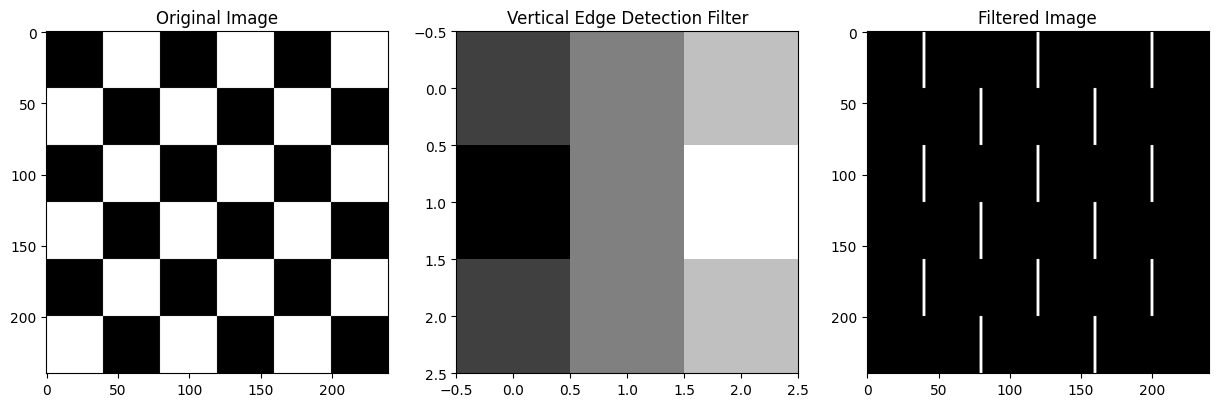

In [19]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt


img = cv2.imread('chessboard.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

filter = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])


edges = cv2.filter2D(img, -1, filter)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(filter, cmap='gray')
axs[1].set_title('Vertical Edge Detection Filter')
axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Filtered Image')
plt.show()

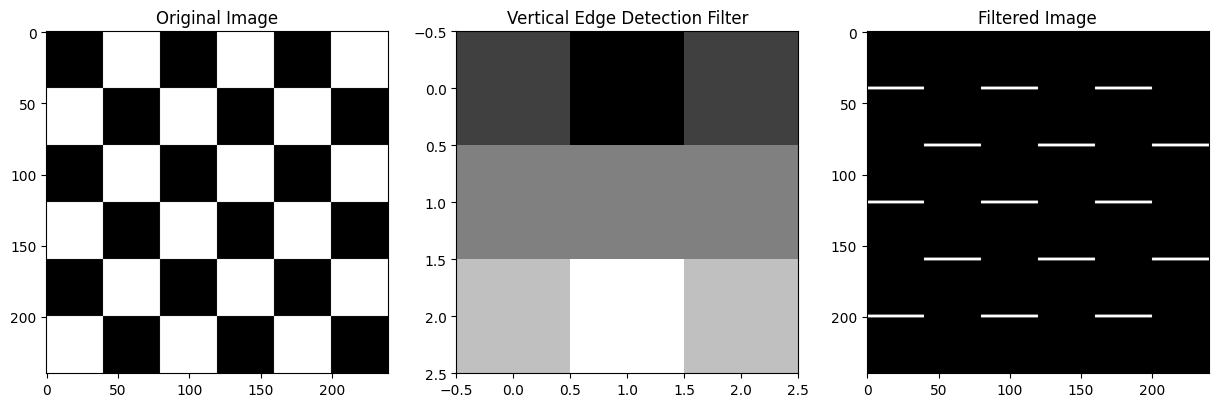

In [20]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt


img = cv2.imread('chessboard.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

filter = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                  [ 1,  2,  1]])


edges = cv2.filter2D(img, -1, filter)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(filter, cmap='gray')
axs[1].set_title('Vertical Edge Detection Filter')
axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Filtered Image')
plt.show()

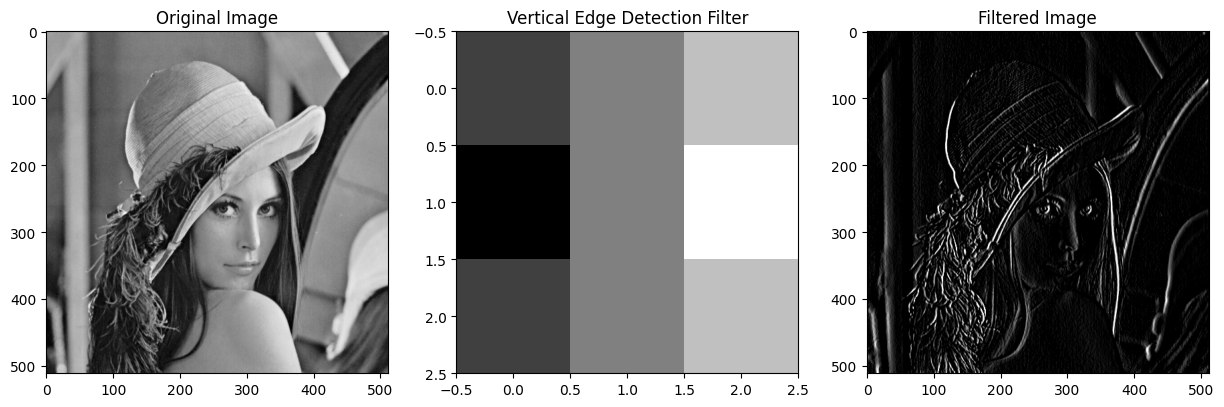

In [23]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
with urllib.request.urlopen(url) as url_response:
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

#  vertical edge detection filter
filter = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])


edges = cv2.filter2D(img, -1, filter)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(filter, cmap='gray')
axs[1].set_title('Vertical Edge Detection Filter')
axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Filtered Image')
plt.show()


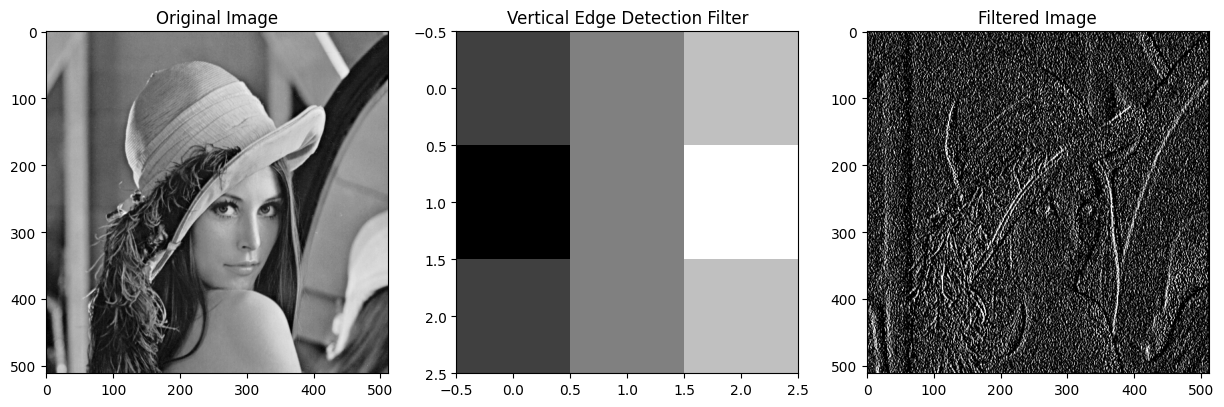

In [25]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
with urllib.request.urlopen(url) as url_response:
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

#  Gaussian noise
mean = 0
std = 30
noisy_img = img + np.random.normal(mean, std, img.shape).astype(np.uint8)


filter = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])


edges = cv2.filter2D(noisy_img, -1, filter)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(filter, cmap='gray')
axs[1].set_title('Vertical Edge Detection Filter')
axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Filtered Image')
plt.show()


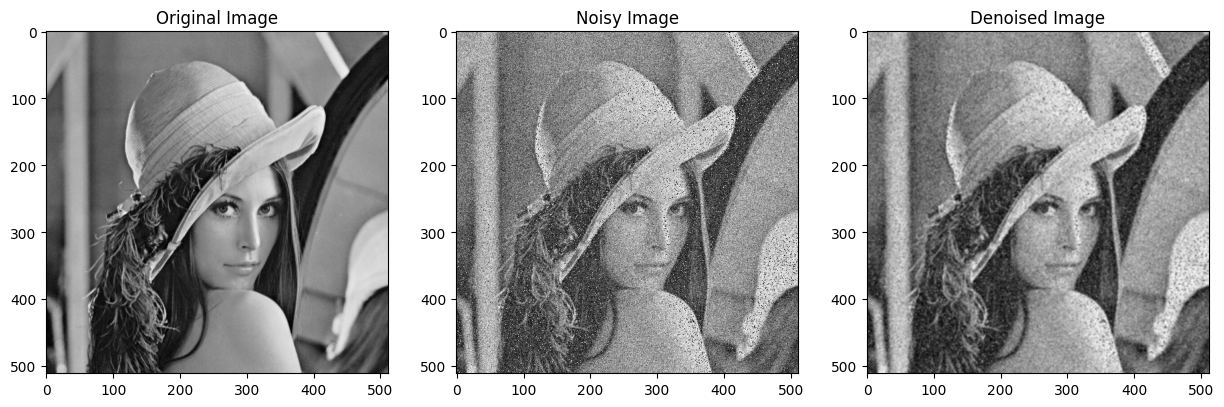

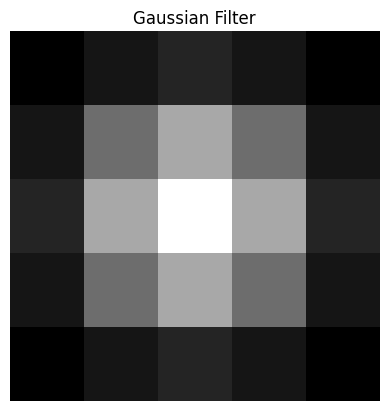

In [28]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt


url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
with urllib.request.urlopen(url) as url_response:
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

#  Gaussian noise
mean = 0
std = 30
noisy_img = img + np.random.normal(mean, std, img.shape).astype(np.uint8)

# Gaussian blur for denoising
kernel_size = (5, 5)
denoised_img = cv2.GaussianBlur(noisy_img, kernel_size, 1)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(noisy_img, cmap='gray')
axs[1].set_title('Noisy Image')
axs[2].imshow(denoised_img, cmap='gray')
axs[2].set_title('Denoised Image')
plt.show()


gaussian_filter = cv2.getGaussianKernel(kernel_size[0], 0)
gaussian_filter = gaussian_filter * gaussian_filter.T
plt.imshow(gaussian_filter, cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')
plt.show()


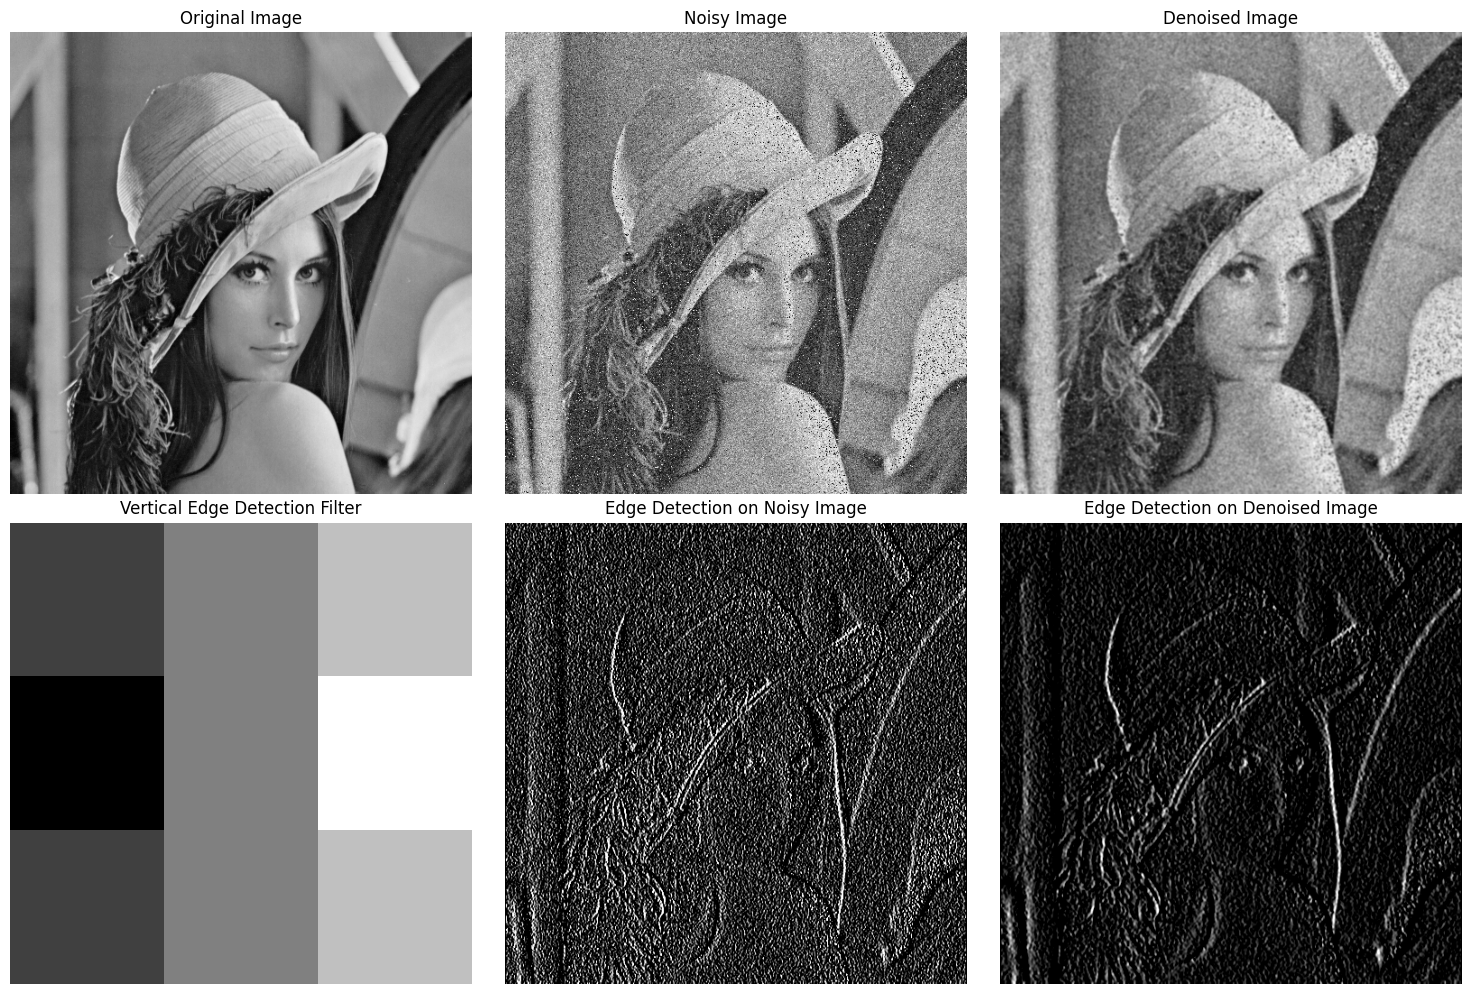

In [30]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt


url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
with urllib.request.urlopen(url) as url_response:
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)


mean = 0
std = 30
noisy_img = img + np.random.normal(mean, std, img.shape).astype(np.uint8)


kernel_size = (5, 5)
denoised_img = cv2.GaussianBlur(noisy_img, kernel_size, 1)


filter = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# edge detection filter to noisy image
noisy_edges = cv2.filter2D(noisy_img, -1, filter)

# edge detection filter to denoised image
denoised_edges = cv2.filter2D(denoised_img, -1, filter)

# Visualize
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(noisy_img, cmap='gray')
axs[0, 1].set_title('Noisy Image')
axs[0, 1].axis('off')

axs[0, 2].imshow(denoised_img, cmap='gray')
axs[0, 2].set_title('Denoised Image')
axs[0, 2].axis('off')

axs[1, 0].imshow(filter, cmap='gray')
axs[1, 0].set_title('Vertical Edge Detection Filter')
axs[1, 0].axis('off')

axs[1, 1].imshow(noisy_edges, cmap='gray')
axs[1, 1].set_title('Edge Detection on Noisy Image')
axs[1, 1].axis('off')

axs[1, 2].imshow(denoised_edges, cmap='gray')
axs[1, 2].set_title('Edge Detection on Denoised Image')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()
